In [1]:
import pandas as pd

# Task 0
Read the dataset from csv file & perform data cleaning - remove all rows, which contains `?` in some columns.
Also check for data correctness (salary & salary $K).

In [20]:
df = pd.read_csv("../data/adult.csv")
df.replace("?", pd.NA, inplace=True)
df.dropna(inplace=True)

df["salary"] = df["salary"].str.replace("K", "", regex=False).astype(str)
df["salary K$"] = pd.to_numeric(df["salary K$"], errors="coerce")
df.dropna(subset=["salary", "salary K$"], inplace=True)
df.isna().sum()

Unnamed: 0        0
age               0
workclass         0
education         0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
hours-per-week    0
native-country    0
salary            0
salary K$         0
dtype: int64

# Task 1
Print the count of men and women in the dataset.

In [21]:
df["sex"].value_counts()

sex
Male      20380
Female     9782
Name: count, dtype: int64

# Task 2
Find the average age of men in dataset

In [23]:
df[df["sex"] == "Male"]["age"].mean()

np.float64(39.18400392541707)

# Task 3
Get the percentage of people from Poland (native-country)

In [25]:
df["native-country"].value_counts(normalize=True).get("Poland", 0) * 100

np.float64(0.18566408063125786)

# Task 4
Get the mean and standard deviation of the age for people who earn > 50K per year. After this, get it for those who earn <= 50K.

In [31]:
high_income_stats = df[df["salary K$"] > 50]["age"].agg(["mean", "std"])
low_income_stats = df[df["salary K$"] <= 50]["age"].agg(["mean", "std"])
print("Stats for >50K$ income:\n", high_income_stats)
print("Stats for <=50K$ income:\n", low_income_stats)

Stats for >50K$ income:
 mean    43.959110
std     10.269633
Name: age, dtype: float64
Stats for <=50K$ income:
 mean    36.608060
std     13.464631
Name: age, dtype: float64


# Task 5
Check, if there are some people without higher education (education: Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters, Doctorate), but with > 50K salary

In [32]:
higher_education = ["Bachelors", "Prof-school", "Assoc-acdm", "Assoc-voc", "Masters", "Doctorate"]
df[(df["salary K$"] > 50) & (~df["education"].isin(higher_education))]

,Unnamed: 0,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary,salary K$
7,7,52,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,45,United-States,>50,307
10,10,37,Private,Some-college,Married-civ-spouse,Exec-managerial,Husband,Black,Male,80,United-States,>50,116
55,55,43,Private,Some-college,Married-civ-spouse,Tech-support,Husband,White,Male,40,United-States,>50,341
67,67,53,Private,HS-grad,Married-civ-spouse,Adm-clerical,Wife,White,Female,40,United-States,>50,225
68,68,49,Self-emp-inc,Some-college,Married-civ-spouse,Exec-managerial,Husband,White,Male,50,United-States,>50,194
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32462,32462,48,Self-emp-inc,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,50,United-States,>50,343
32518,32518,57,Local-gov,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,40,United-States,>50,116
32519,32519,46,Private,Some-college,Married-civ-spouse,Exec-managerial,Husband,White,Male,48,United-States,>50,239
32557,32557,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50,173


# Task 6
Get the statistics of age for each type of education. Use `groupby` and `describe` for this.

In [33]:
df.groupby("education")["age"].describe()

,count,mean,std,min,25%,50%,75%,max
education,,,,,,,,
10th,820.0,37.897561,16.225795,17.0,23.0,36.0,52.0,90.0
11th,1048.0,32.363550,15.089307,17.0,18.0,28.5,43.0,90.0
12th,377.0,32.013263,14.373710,17.0,19.0,28.0,41.0,79.0
1st-4th,151.0,44.622517,14.929051,19.0,33.0,44.0,56.0,81.0
5th-6th,288.0,41.649306,14.754622,17.0,28.0,41.0,53.0,82.0
7th-8th,557.0,47.631957,15.737479,17.0,34.0,49.0,60.0,90.0
9th,455.0,40.303297,15.335754,17.0,28.0,38.0,53.0,90.0
Assoc-acdm,1008.0,37.286706,10.509755,19.0,29.0,36.0,44.0,90.0
Assoc-voc,1307.0,38.246366,11.181253,19.0,30.0,37.0,45.0,84.0


# Task 7
Compare the married and non-married men salaries. Who earns more? (>50K or <=50K)
Married men are those, whom `marital-status` starts with "Married". Others are not.

In [35]:
married_men = df[(df["sex"] == "Male") & (df["marital-status"].str.startswith("Married"))]
non_married_men = df[(df["sex"] == "Male") & (~df["marital-status"].str.startswith("Married"))]
married_salary_counts = married_men["salary"].value_counts()
non_married_salary_counts = non_married_men["salary"].value_counts()
if married_salary_counts.get(">50K", 0) > non_married_salary_counts.get(">50K", 0):
    print("Married men are more likely to earn >50K.")
else:
    print("Non-married men are more likely to earn >50K.")

Non-married men are more likely to earn >50K.


# Task 8
Get the max hours per week some person works. How many people works the same amount of hours per week?

In [36]:
max_hours = df["hours-per-week"].max()
people_with_max_hours = df[df["hours-per-week"] == max_hours]
print("Max hours per week:", max_hours)
print("People with max hours per week:", len(people_with_max_hours))

Max hours per week: 99
People with max hours per week: 78


# Task 9
Analyze the correlation between data in dataset. Understand connected fields in it and print highlight thier connection.

                Unnamed: 0       age  hours-per-week  salary K$
Unnamed: 0        1.000000 -0.001126       -0.001890   0.000129
age              -0.001126  1.000000        0.101599   0.208203
hours-per-week   -0.001890  0.101599        1.000000   0.196378
salary K$         0.000129  0.208203        0.196378   1.000000


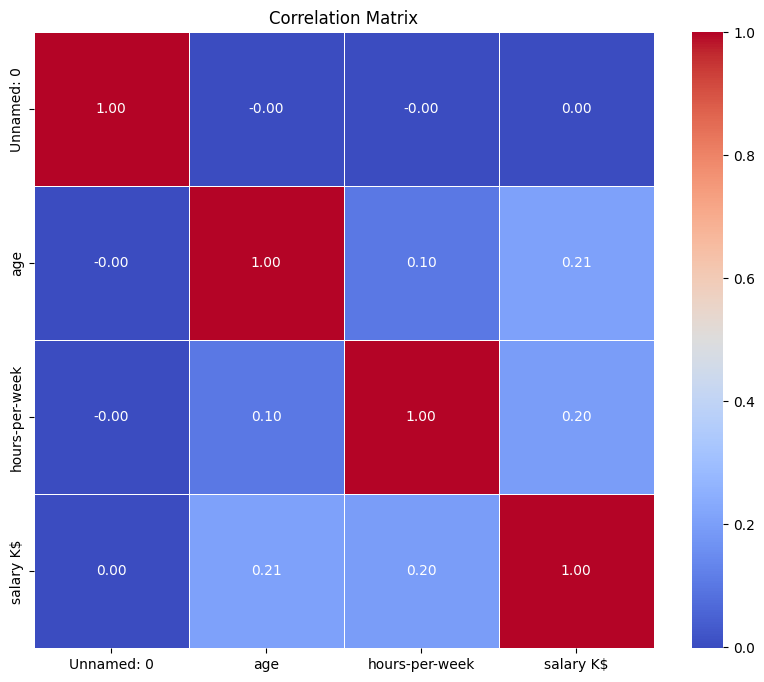

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_df = df.select_dtypes(include=["number"])
correlation = numeric_df.corr()
print(correlation)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()